<a href="https://colab.research.google.com/github/naimurborno/Object-Detection-using-api/blob/main/siamese%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import Model,Input
from tensorflow.keras import datasets
import random
from tensorflow.keras import backend as K

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
def create_pairs_on_set(x,digit_indices):
  pairs=[]
  labels=[]
  n=min([len(digit_indices[d]) for d in range(10)])-1
  for d in range(10):
    for i in range(n):
      z1,z2=digit_indices[d][i],digit_indices[d][i+1]
      pairs+=[[x[z1],x[z2]]]
      inc=random.randrange(1,10)
      dn=(inc+d)%10
      z1,z2=digit_indices[d][i],digit_indices[dn][i]
      pairs+=[[x[z1],x[z2]]]
      labels+=[1,0]
  return np.array(pairs),np.array(labels)

def create_pairs(images,labels):
  digit_indices=[np.where(i==labels)[0] for i in range(10)]
  pairs,y=create_pairs_on_set(images,digit_indices)
  y=y.astype('float32')
  return pairs,y

In [5]:
tr_pairs,tr_y=create_pairs(X_train,y_train)

In [6]:
tr_pairs.shape

(119980, 2, 28, 28)

In [7]:
tr_y.shape

(119980,)

In [8]:
def intialize_the_network():
  input=Input(shape=(28,28),name='input_shape')
  x=keras.layers.Flatten()(input)
  x=keras.layers.Dense(500,activation='relu')(x)
  x=keras.layers.Dense(1000,activation='relu')(x)
  x=keras.layers.Dense(2000,activation='relu')(x)
  return Model(inputs=input,outputs=x)

In [9]:
base_network=intialize_the_network()

In [10]:
def euclidean_distance(vects):
  x, y = vects
  sum_squares = K.sum(K.square(x-y), axis=1, keepdims=True)
  # K.epsilon() = 1e-07 -> prevent number goes to small
  return K.sqrt(K.maximum(sum_squares, K.epsilon()))

def eucl_dist_output_shape(shapes):
  shape1, shape2 = shapes
  return (shape1[0], 1)

In [11]:
input_a=Input(shape=(28,28),name='left_input')
vect_a=base_network(input_a)
input_b=Input(shape=(28,28),name='right_input')
vect_b=base_network(input_b)
lamda=keras.layers.Lambda(function=euclidean_distance,output_shape=eucl_dist_output_shape)
output=lamda([vect_a,vect_b])
model=Model(inputs=[input_a,input_b],outputs=output)

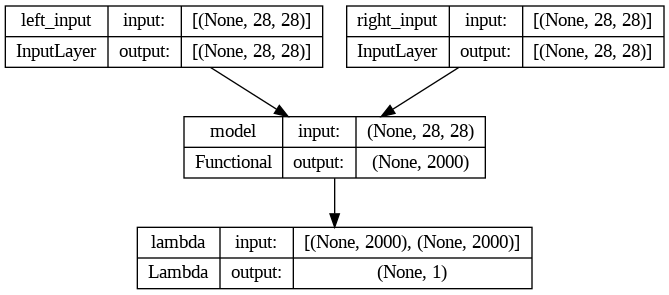

In [12]:
keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)

In [15]:
def contrastive_loss_with_margin(margin):
  def contrastive_loss(y_true, y_pred):
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin-y_pred, 0))
    return ((1 - y_true) * margin_square + y_true * square_pred)
  return contrastive_loss

In [16]:
model.compile(
    optimizer='adam',
    loss=contrastive_loss_with_margin(margin=1),
)

In [17]:
model.fit(x=[tr_pairs[:,1],tr_pairs[:,0]],y=tr_y,epochs=10)

Epoch 1/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.4997
Epoch 2/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4997
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4997
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4997
Epoch 5/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4997
Epoch 6/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4997
Epoch 7/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4997
Epoch 8/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4997
Epoch 9/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4997
Epoch 10/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4997
